In [2]:
!mkdir -p ~/.ssh
!ssh-keyscan github.com >> ~/.ssh/known_hosts  # 关键步骤：信任GitHub服务器
!chmod 600 ~/.ssh/known_hosts                 # 设置正确权限

# github.com:22 SSH-2.0-133e47a51
# github.com:22 SSH-2.0-133e47a51
# github.com:22 SSH-2.0-133e47a51
# github.com:22 SSH-2.0-133e47a51
# github.com:22 SSH-2.0-133e47a51


In [5]:
# 清除旧密钥（如果存在）
!rm -rf ~/.ssh/id_ed25519*

# 生成新密钥（Ed25519算法更安全）
!ssh-keygen -t ed25519 -C "caoyangtommy@hotmail.com" -f ~/.ssh/id_ed25519 -N ""

# 显示公钥内容
print("请复制以下公钥到GitHub：")
!cat ~/.ssh/id_ed25519.pub

Generating public/private ed25519 key pair.
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:UEsnpdU9l30Y1QFakSUnso6mvyZdAayt7VDGbIlATuA caoyangtommy@hotmail.com
The key's randomart image is:
+--[ED25519 256]--+
|   .oo  =.+o B*B*|
|  . o. o O  *.B.=|
|   E .o O oo   o.|
|       + Oo.     |
|        So ..    |
|       oo. .     |
|       .+ .      |
|       ..+       |
|        oo.      |
+----[SHA256]-----+
请复制以下公钥到GitHub：
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIGnZB45IAIDD5JXBbagLUfjS2g6LXx7Sss4wZsjqQ3jb caoyangtommy@hotmail.com


In [6]:
!ssh -T git@github.com  # 应看到"Hi username! You've successfully authenticated..."

Hi itshisher! You've successfully authenticated, but GitHub does not provide shell access.


#**Required Libraries**

In [7]:
import os
import glob
from IPython.display import display, Image

#**Check GPU**

In [8]:
!nvidia-smi

Mon Apr  7 05:39:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
HOME = os.getcwd()
print(HOME)

/content


#**Installing Ultralytics**

In [10]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [11]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.9/112.6 GB disk)


#**Import Personal Protective Equipment from Roboflow**

In [12]:
# create a new directory
!mkdir {HOME}/datasets

In [13]:
# print current file path
!pwd

/content


In [14]:
%cd {HOME}/datasets
!pwd

/content/datasets
/content/datasets


In [15]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ALndNindHeuGnpSjWZ4q")
project = rf.workspace("objet-detect-yolov5").project("eep_detection-u9bbd")
version = project.version(1)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to EEP_Detection-1 in yolov5pytorch:: 100%|██████████| 6482/6482 [00:01<00:00, 5655.40it/s]


#**Train the YOLOv8 Model on the Dataset**

In [16]:
%cd {HOME}
%cd {dataset.location}

/content
/content/datasets/EEP_Detection-1


In [17]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/EEP_Detection-1/data.yaml epochs=50 imgsz=640 batch=8
# cpu情况下
# from ultralytics import YOLO
# model = YOLO('yolov8n.pt')  # 使用最小的nano模型减少计算量
# model.train(
#     data='/content/datasets/EEP_Detection/data.yaml',
#     epochs=20,
#     device='cpu',  # 强制使用CPU
#     workers=0,     # CPU模式下建议设为0
#     batch=4,       # 大幅减小batch_size
#     imgsz=320      # 降低输入分辨率
# )

/content
100% 49.7M/49.7M [00:00<00:00, 120MB/s]
Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/EEP_Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fa

In [18]:
!ls {HOME}/runs/detect/train

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1744005209.ccca7d995903.5410.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch11320.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch11321.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch11322.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


#**Displaying the Confusion Matrix**

/content


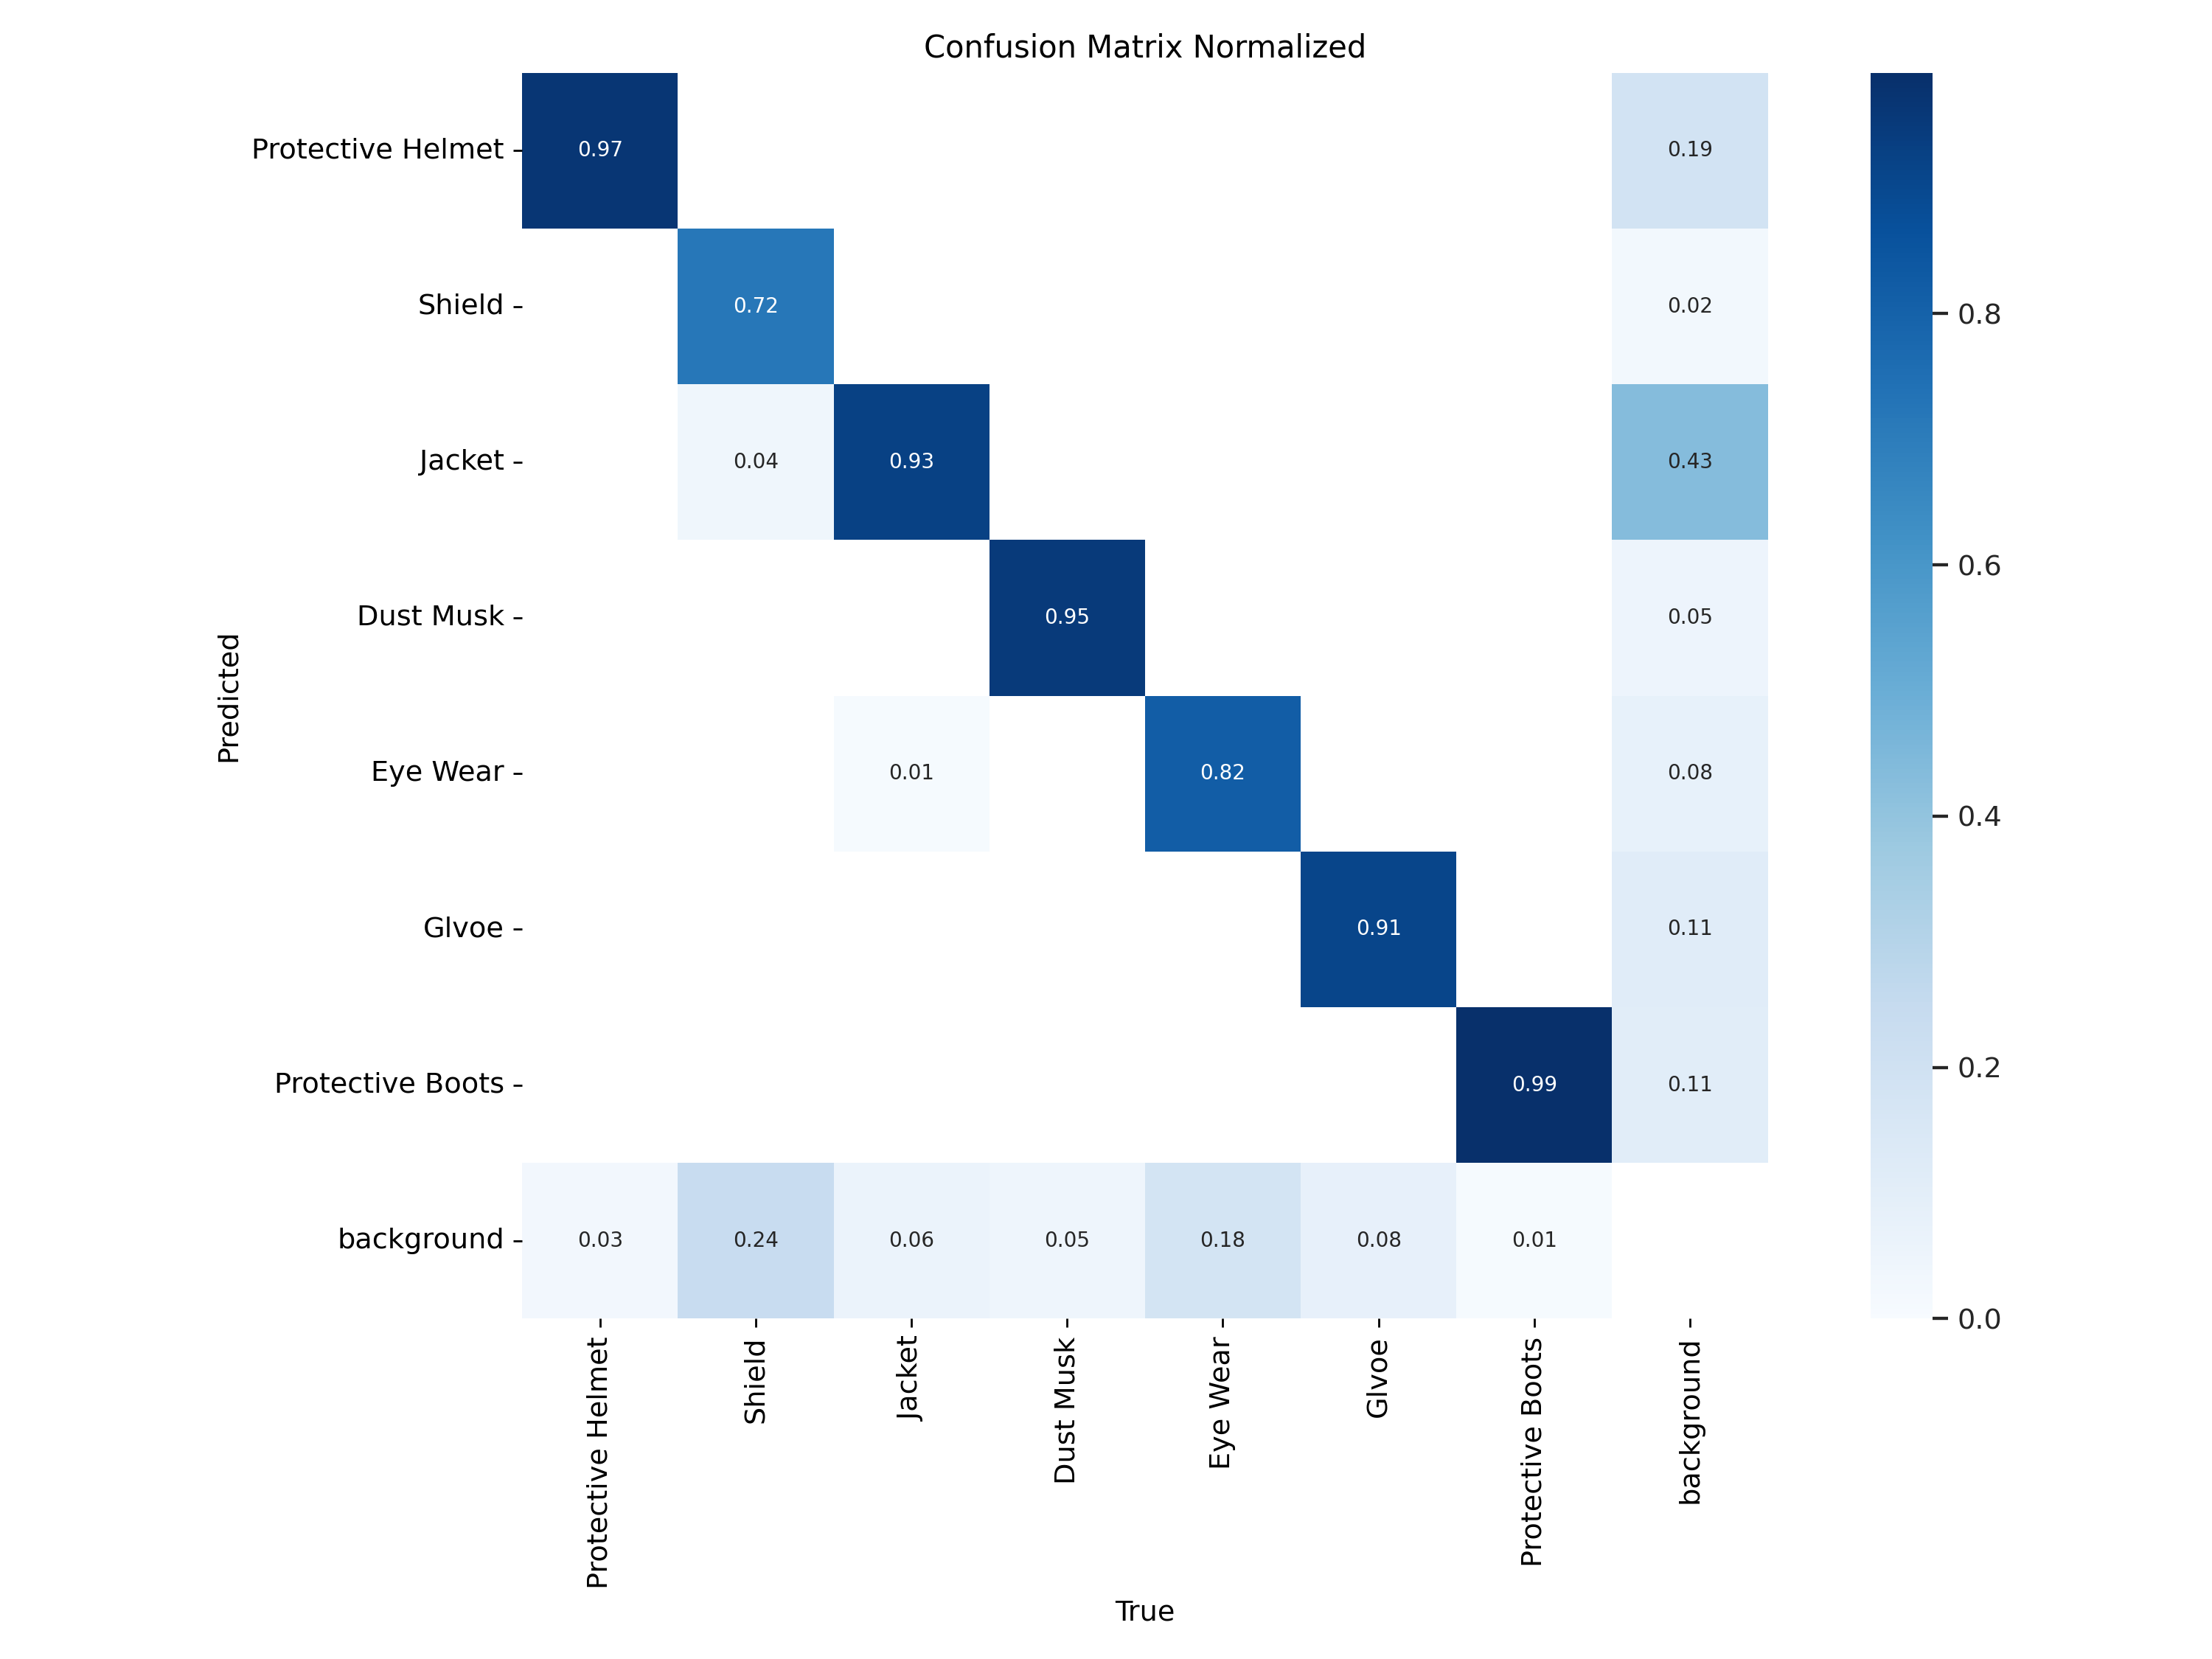

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=900)

#**Training and Validation Loss**

/content


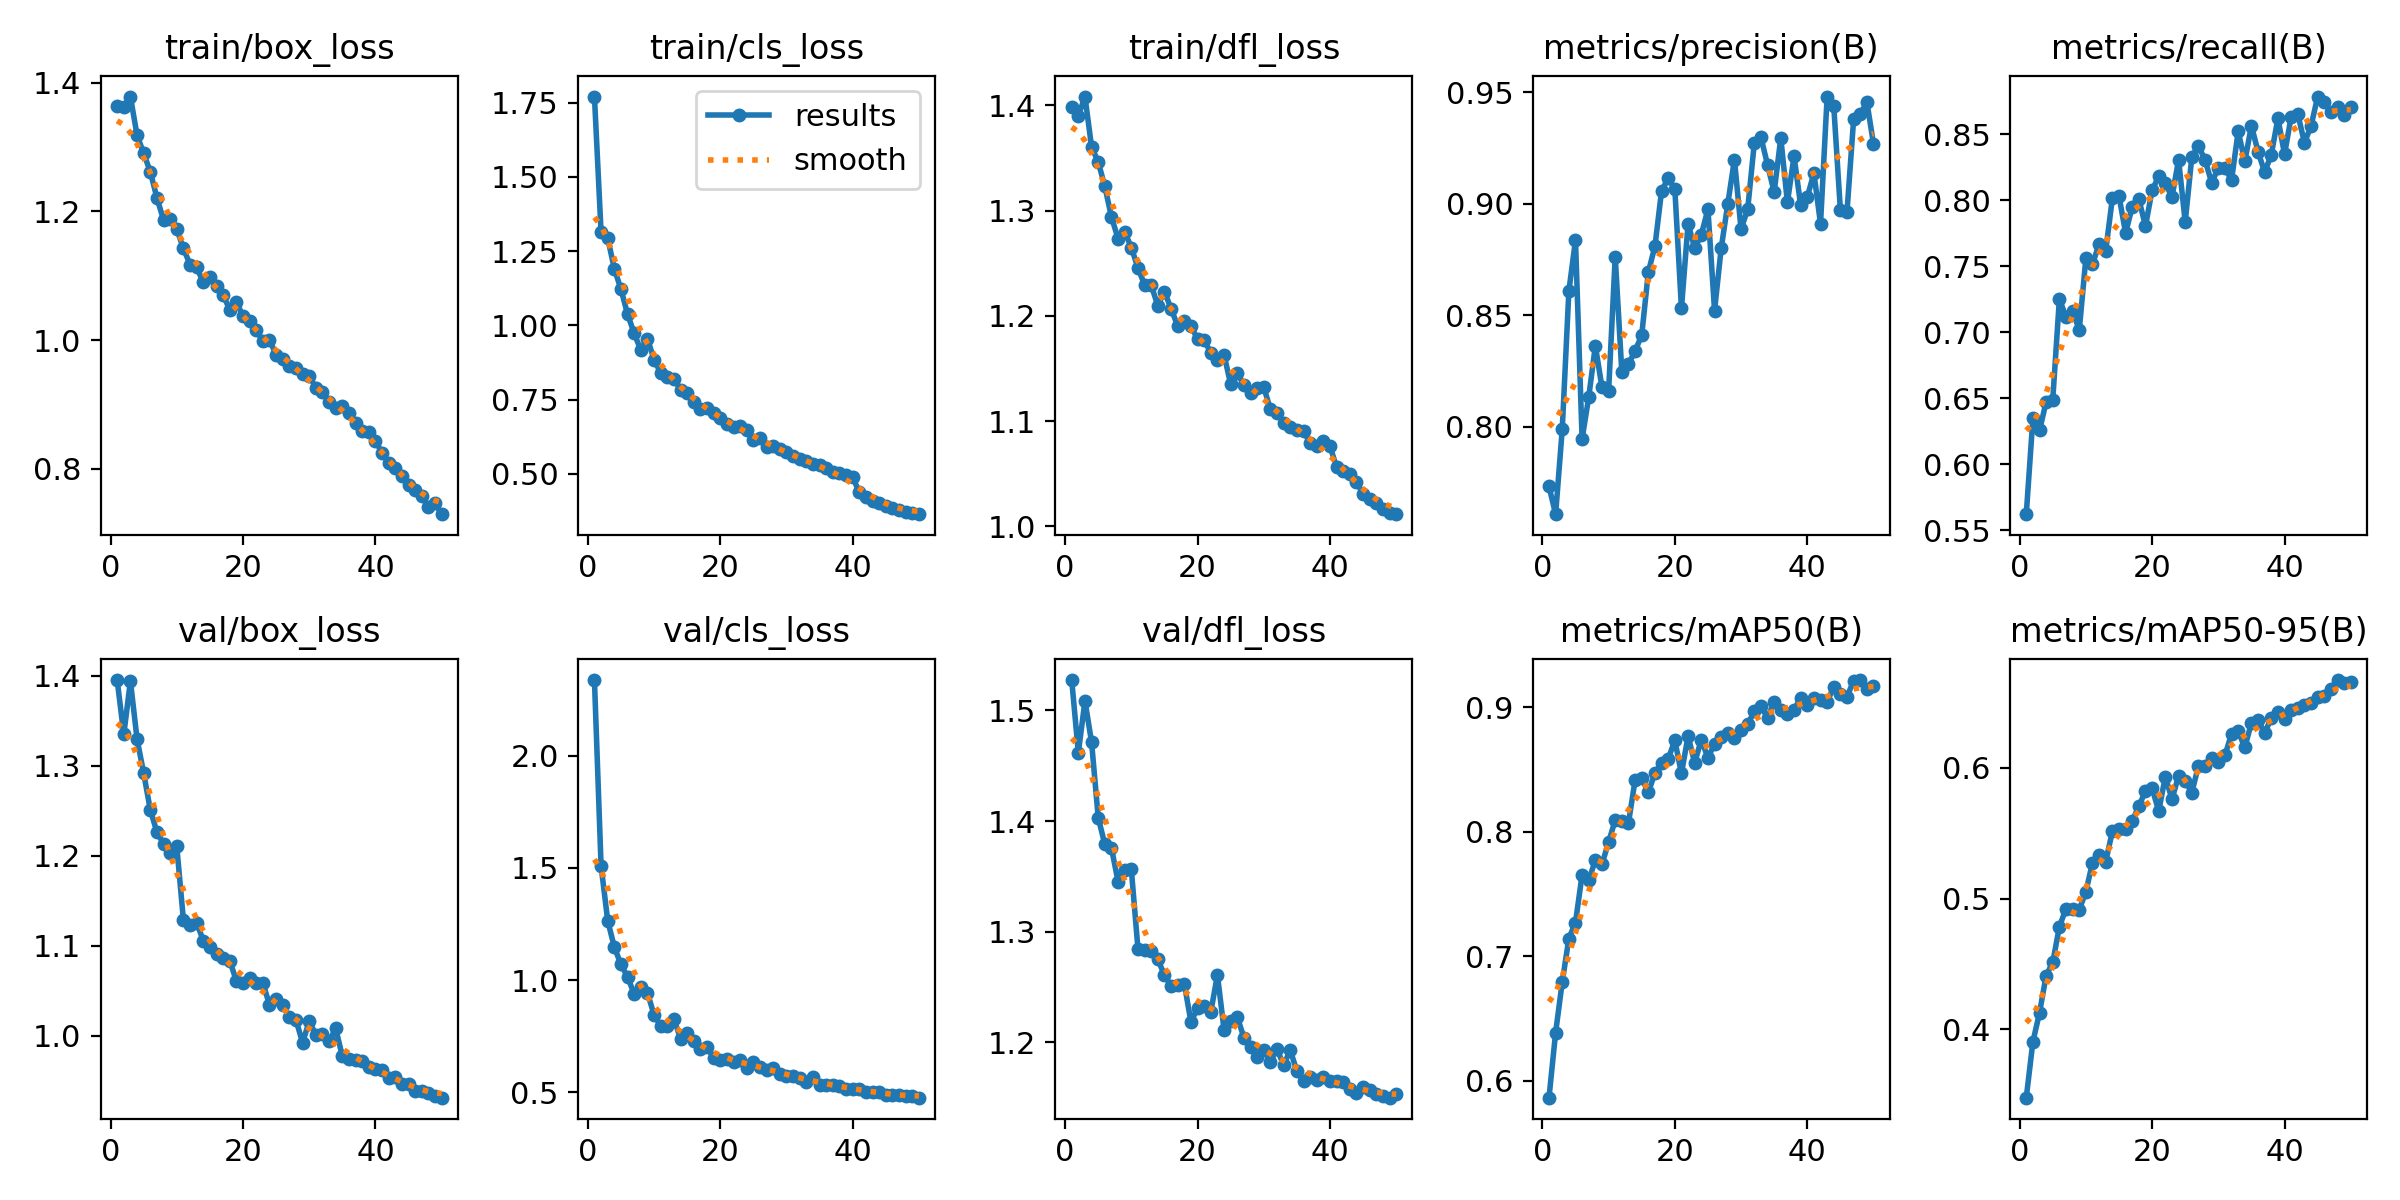

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=900)

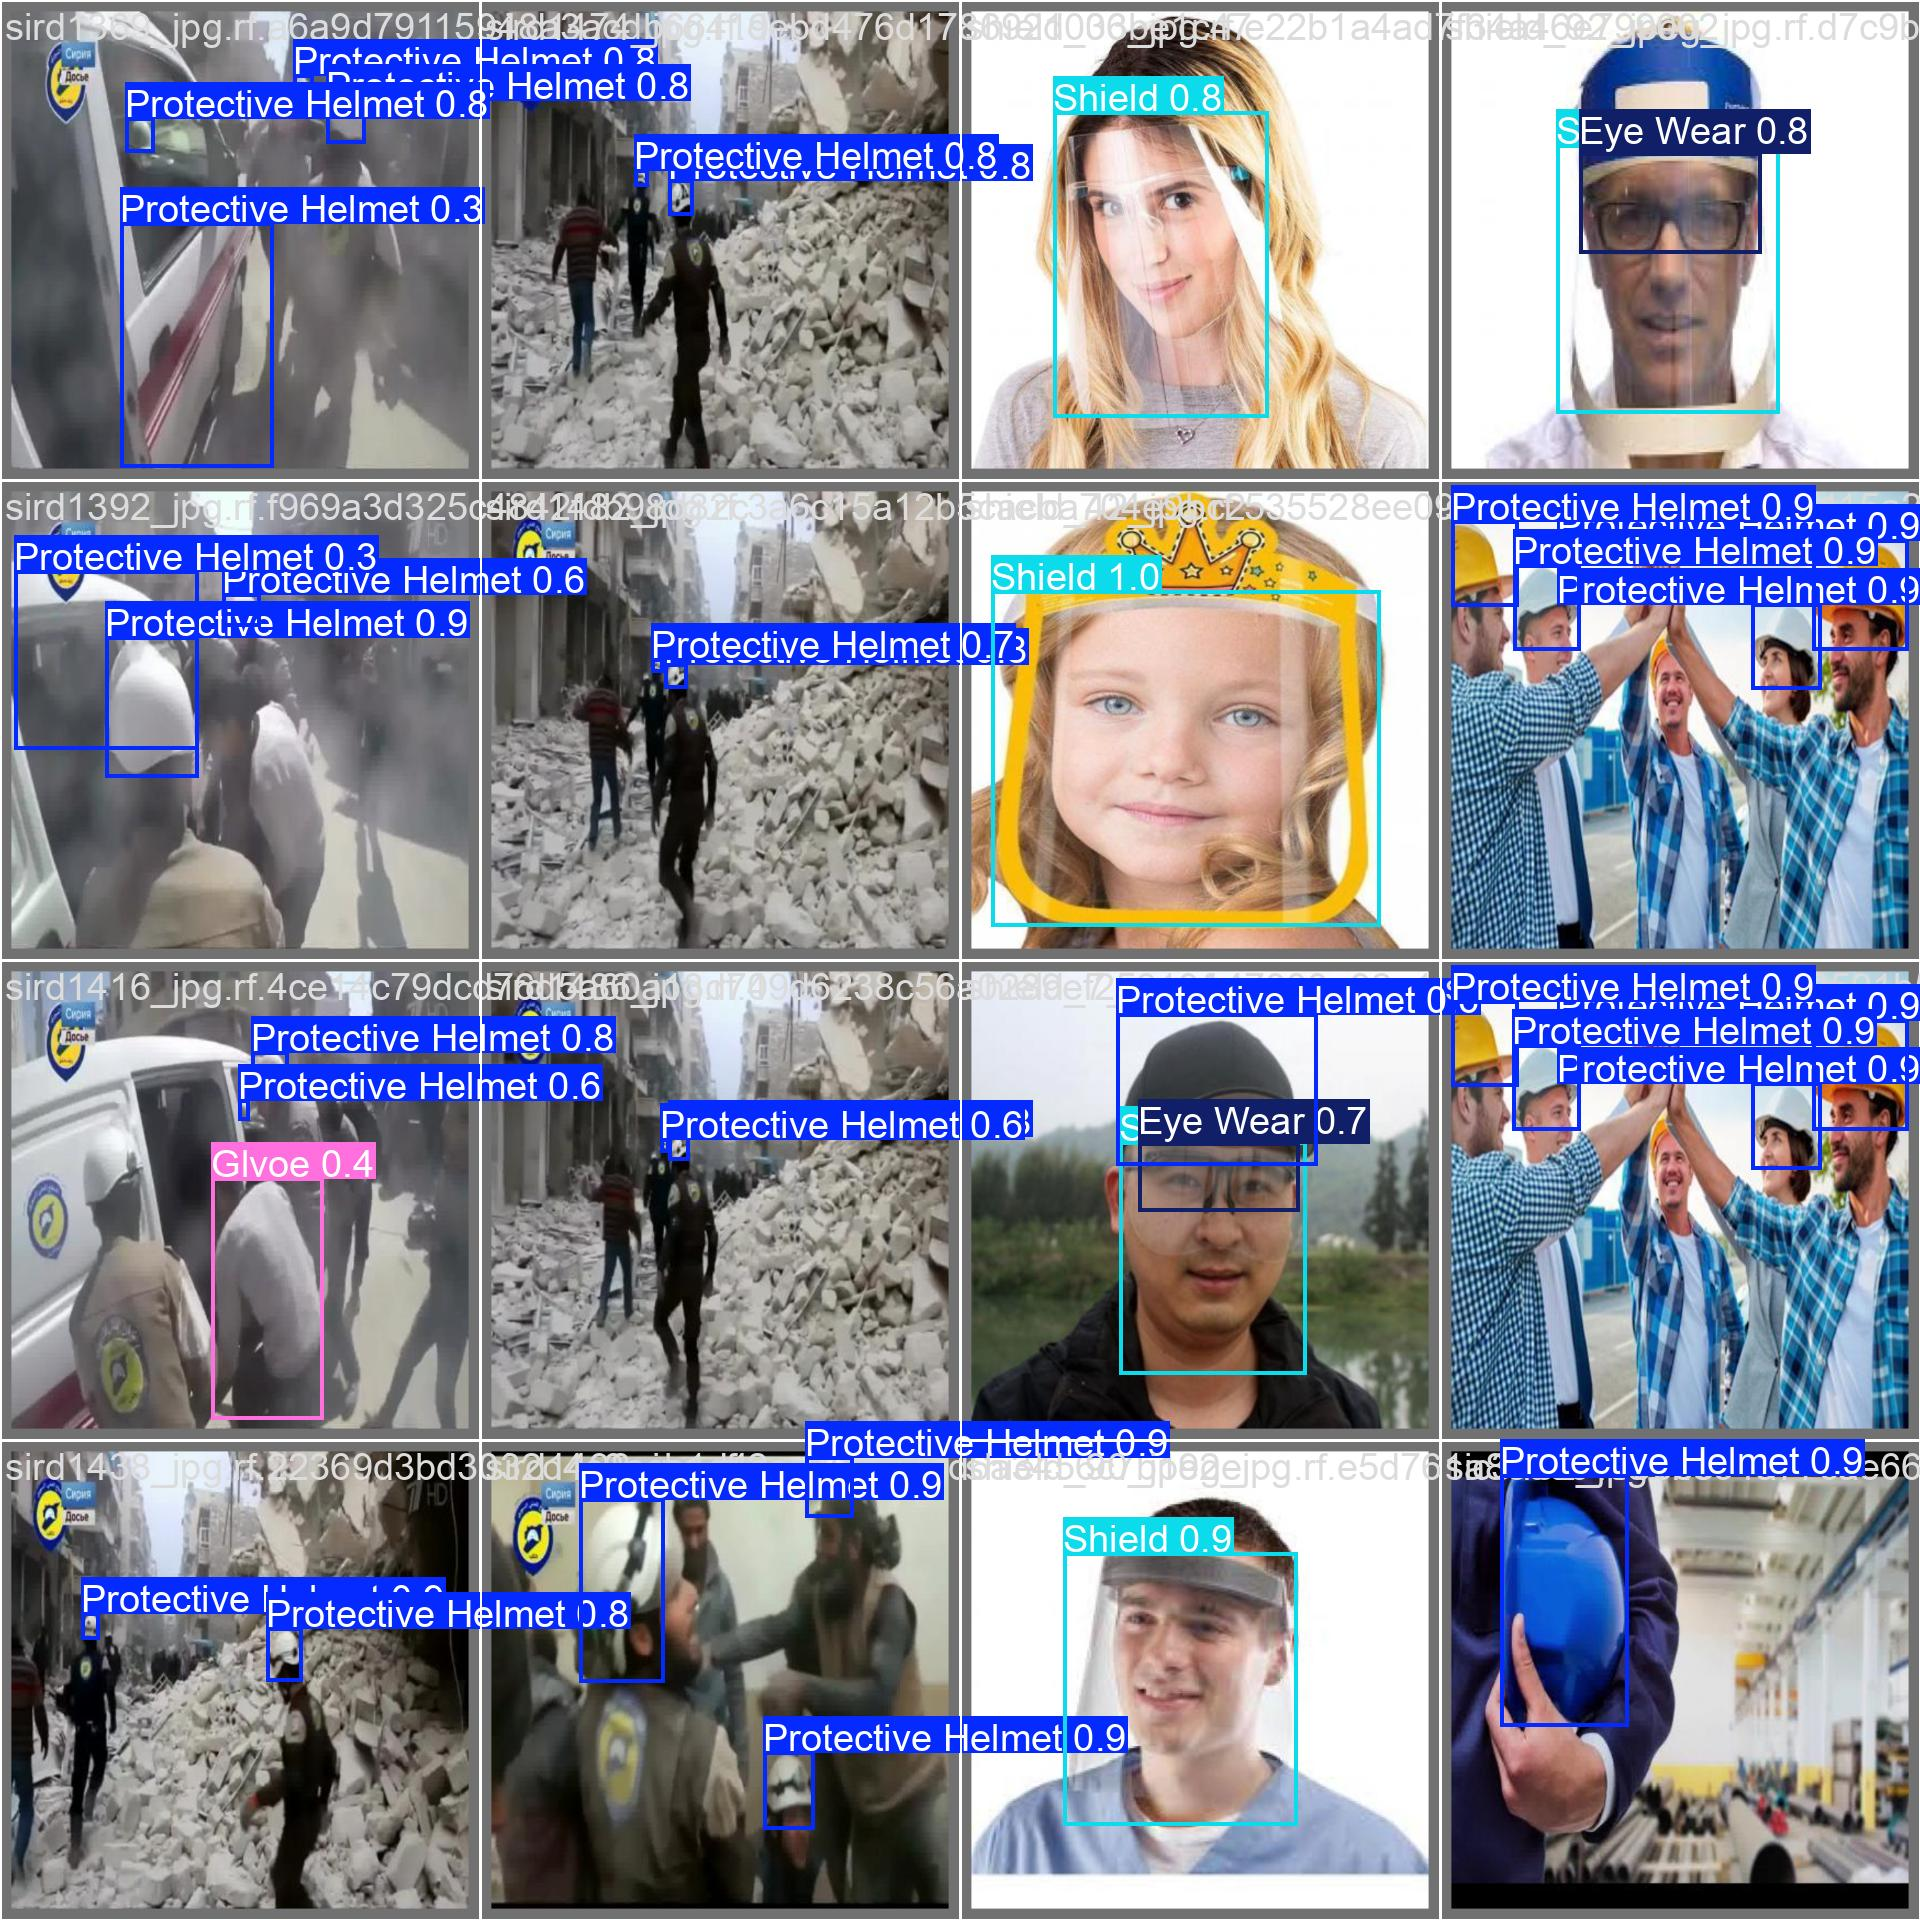

In [23]:
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=900)

#**Validate Custome Model**

In [24]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/EEP_Detection-1/data.yaml

Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/EEP_Detection-1/valid/labels.cache... 647 images, 0 backgrounds, 0 corrupt: 100% 647/647 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 41/41 [00:16<00:00,  2.42it/s]
                   all        647       3074      0.941       0.87      0.922      0.667
     Protective Helmet        408        765      0.972      0.957      0.981      0.783
                Shield         25         25      0.875       0.68      0.768      0.487
                Jacket        361        580        0.9      0.883      0.941      0.737
             Dust Musk        304        314      0.978      0.933      0.972      0.713
              Eye Wear        148        149      0.915      0.765      0.847       0.49
                 Glvoe        354    

#**Inference with Custom Model**

In [25]:
#Inference means a prediction that we can run on an image to detect the label,
# whether classification or of a bounding box or a segmentation
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/datasets/EEP_Detection-1/test/images'

/content
Ultralytics 8.3.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs

image 1/324 /content/datasets/EEP_Detection-1/test/images/000446_jpg.rf.ae946a1122b8eaac534a4954f07b3755.jpg: 640x640 2 Protective Helmets, 1 Dust Musk, 1 Glvoe, 37.0ms
image 2/324 /content/datasets/EEP_Detection-1/test/images/20220721_161946_jpg.rf.149c26cf563aa2ace0bdc099c4af8fef.jpg: 640x640 1 Glvoe, 37.0ms
image 3/324 /content/datasets/EEP_Detection-1/test/images/20220721_162015_jpg.rf.f71cba1429b26a3c95b6f8706ea69853.jpg: 640x640 1 Dust Musk, 37.0ms
image 4/324 /content/datasets/EEP_Detection-1/test/images/20220721_162036_jpg.rf.f6b8fdbdef55ce36cd4ad61549b2c1e2.jpg: 640x640 1 Dust Musk, 36.9ms
image 5/324 /content/datasets/EEP_Detection-1/test/images/20220721_162308_jpg.rf.32a4cbe5e0f3e1bc5159596a1bbb833d.jpg: 640x640 1 Eye Wear, 36.9ms
image 6/324 /content/datasets/EEP_Detection-1/test/images/20220721_162435

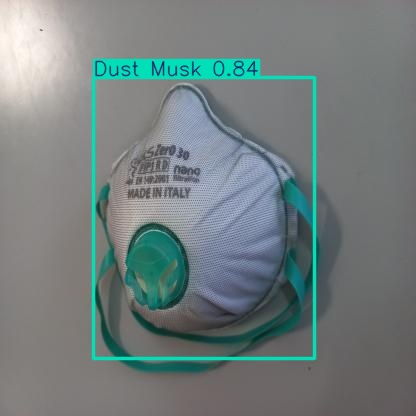

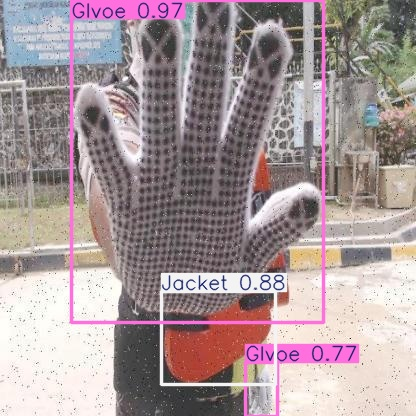

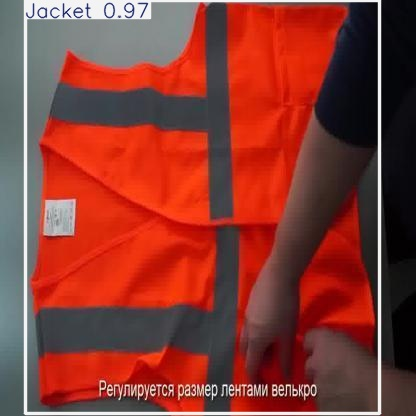

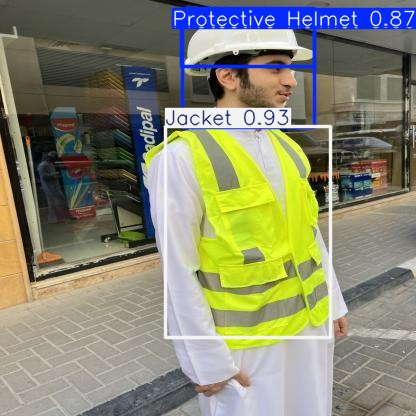

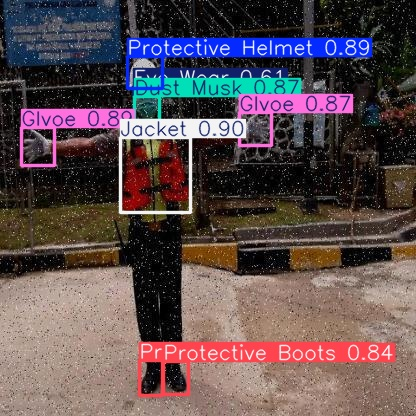

In [26]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [27]:
# 清除旧密钥（如果存在）
!rm -rf ~/.ssh/id_ed25519*

# 生成新密钥（Ed25519算法更安全）
!ssh-keygen -t ed25519 -C "caoyangtommy@hotmail.com" -f ~/.ssh/id_ed25519 -N ""

# 显示公钥内容
print("请复制以下公钥到GitHub：")
!cat ~/.ssh/id_ed25519.pub

Generating public/private ed25519 key pair.
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:NEuHJot8tUG0RH1Zqbbor4rypvCUK2e0SmNy1613hnk caoyangtommy@hotmail.com
The key's randomart image is:
+--[ED25519 256]--+
|       o=.   o.. |
|       o o. o .  |
|      . X .. .   |
|   . . B *  o    |
|    o o S  o .   |
|    .+ .  . .    |
|. *.+.. .+       |
| =.*=..o+ E      |
|  .=+=+..=.o.    |
+----[SHA256]-----+
请复制以下公钥到GitHub：
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAILf0JCY84KORHImVYh4cxq4Tc9AfRIjYAKBE+lHcWh4L caoyangtommy@hotmail.com


In [28]:
!ssh -T git@github.com

Hi itshisher! You've successfully authenticated, but GitHub does not provide shell access.


In [29]:
# 进入 Colab 的根目录
%cd /content

# 克隆仓库（替换为你的仓库地址）
!git clone git@github.com:itshisher/ObjectDetectionProjects.git
%cd ObjectDetectionProjects

/content
Cloning into 'ObjectDetectionProjects'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/ObjectDetectionProjects


In [30]:
#创建标准目录结构
!mkdir -p models datasets results

In [31]:
# 复制文件到仓库目录
!cp -r /content/runs/detect/train/weights/best.pt ./models/  # 模型
!cp -r /content/datasets/EEP_Detection-1 ./datasets/           # 数据集
!cp -r /content/runs/detect/val ./results/                  # 验证结果

In [32]:
!git add .

In [34]:
!git config --global user.email "caoyangtommy@hotmail.com"
!git config --global user.name "itshisher"

In [35]:
!git commit -m "feat: Add YOLOv8 model, dataset, and validation results"

Streaming output truncated to the last 5000 lines.
 create mode 100644 datasets/EEP_Detection-1/train/images/image_130_jpg.rf.0ecb10f82c768a19bdaaddc46f8473a1.jpg
 create mode 100644 datasets/EEP_Detection-1/train/images/image_131_jpg.rf.b505234c0667fb2aec0979612c87227d.jpg
 create mode 100644 datasets/EEP_Detection-1/train/images/image_131_jpg.rf.f4d796726aa4a6e3040e09a001360cc6.jpg
 create mode 100644 datasets/EEP_Detection-1/train/images/image_132_jpg.rf.376486dcf80cda691445d297ff77dc10.jpg
 create mode 100644 datasets/EEP_Detection-1/train/images/image_133_jpg.rf.0c21711e97c56d3d8316d0ae505ef6aa.jpg
 create mode 100644 datasets/EEP_Detection-1/train/images/image_133_jpg.rf.93f2746a8a340658cc681644a3b5178b.jpg
 create mode 100644 datasets/EEP_Detection-1/train/images/image_134_jpg.rf.224d461472910c62f2e89098cb5f9b61.jpg
 create mode 100644 datasets/EEP_Detection-1/train/images/image_134_jpg.rf.5215a5eaddadc2e288532a2716a89b68.jpg
 create mode 100644 datasets/EEP_Detection-1/train/im

In [36]:
!git push origin main

Enumerating objects: 5691, done.
Counting objects: 100% (5691/5691), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5682/5682), done.
Writing objects: 100% (5690/5690), 155.57 MiB | 12.67 MiB/s, done.
Total 5690 (delta 4), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (4/4), done.
To github.com:itshisher/ObjectDetectionProjects.git
   93be20c..78e3a0f  main -> main
